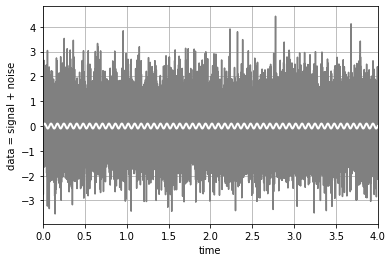

In [2]:
"""
Gaussian noise with a sinusoidal signal added 
"""
import numpy as np
import matplotlib.pyplot as plt

fs = 4096           # sampling rate [Hz]  
T = 4               # duration [s]
amp = 0.1           # amplitude of the sinusoid 
ome = 13            # frequency of the signal 
N = T*fs            # total number of points 

# time interval spaced with 1/fs 
t = np.arange(0, T, 1./fs)
# white noise 
noise = np.random.normal(size=t.shape)
# sinusoidal signal with amplitude amp
template = amp*np.sin(ome*2*np.pi*t)
 
# data: signal (template) with added noise 
data = template + noise

fig = plt.figure()
plt.plot(t, data, '-', color="grey")
plt.plot(t, template, '-', color="white", linewidth=2)
plt.xlim(0, T)
plt.xlabel('time')
plt.ylabel('data = signal + noise')
plt.grid(True)
 
plt.show();

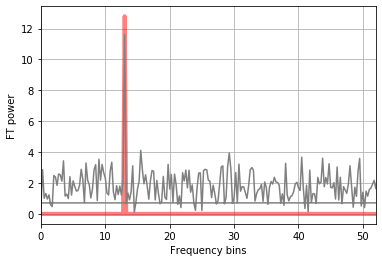

In [4]:
"""
Discrete Fourier transform of the signal in noise 
"""

# FFT of the template and the data (not normalized)  
template_fft = np.fft.fft(template)
data_fft = np.fft.fft(data)

# Sampling frequencies up to the Nyquist limit (fs/2)  
sample_freq = np.fft.fftfreq(t.shape[-1], 1./fs)

# FT power 
fig= plt.figure()
plt.plot(sample_freq, np.abs(template_fft)/np.sqrt(fs), color="red", alpha=0.5, linewidth=4)
plt.plot(sample_freq, np.abs(data_fft)/np.sqrt(fs), color="grey")

# taking positive spectrum only: plt.xlim(0, np.max(sample_freq)) 
# peak closeup:   
plt.xlim(0, 4*ome)
plt.xlabel('Frequency bins')
plt.ylabel('FT power')
plt.grid(True)
plt.show();

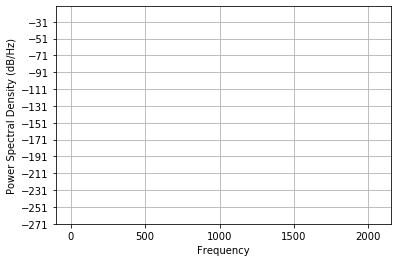

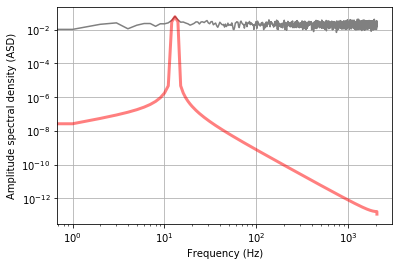

In [6]:
"""
Power and amplitude spectral density using plt.psd
"""

# Power spectrum density of the data and the signal template  
power_data, freq_psd = plt.psd(data, Fs=fs, NFFT=fs, visible=False)
power, freq = plt.psd(template, Fs=fs, NFFT=fs, visible=False)

fig = plt.figure()
# sqrt(power_data) - amplitude spectral density (ASD)
plt.loglog(freq_psd, np.sqrt(power_data), 'gray')
plt.loglog(freq, np.sqrt(power), color="red", alpha=0.5, linewidth=3)

# range is from 0 to the Nyquist frequency
#plt.xlim(0, fs/2)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude spectral density (ASD)')
plt.grid(True)
plt.show();

In [11]:
"""
Optimal matched filter 
"""

# Matching the FFT frequency bins to PSD frequency bins
# (in the region where is no signal)
power_vec = np.interp(sample_freq, freq_psd[2*ome:], power_data[2*ome:])

# Applying the matched filter (template is the signal)
matched_filter = 2*np.fft.ifft(data_fft * template_fft.conjugate()/power_vec)
SNR_matched = np.sqrt(np.abs(matched_filter)/fs)

# Optimal filter 
optimal_filter = 2*np.fft.ifft(template_fft * template_fft.conjugate()/power_vec)
SNR_optimal = np.sqrt(np.abs(optimal_filter)/fs)

# Estimate of the signal-to-noise 
SNR_estimate = amp*np.sqrt(T)/np.sqrt(np.average(power_vec))

print("SNR_estimate", SNR_estimate, 
      "SNR_optimal", np.max(SNR_optimal), 
      "SNR_matched", np.max(SNR_matched)
     )

SNR_estimate 7.7602726600475815 SNR_optimal 6.93567768377876 SNR_matched 6.6035262687942105


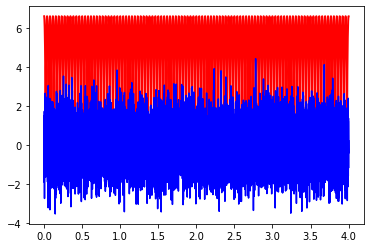

In [22]:
fig = plt.figure()
plt.plot(t, SNR_matched, '-', color="red", linewidth=2)
plt.plot(t, data, '-', color="blue")
#plt.xlim(0,3/ome)
plt.show()

In [35]:
import h5py

# Read in data and template
dataFile = h5py.File('../DATA/data_and_template.hdf5', 'r')
list(dataFile.keys())

['datawsignal', 'template']

In [36]:
data = dataFile['datawsignal'][...]
template = dataFile['template'][...]
dataFile.close()

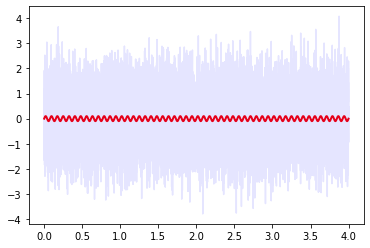

In [29]:
fig = plt.figure()
plt.plot(t, template, '-', color="red", linewidth=2)
plt.plot(t, data, '-', color="blue", alpha=.1)
#plt.xlim(0,3/ome)
plt.show()